In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

graphics_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/ND examples/MI calc"

In [2]:
def copula2DGaussian(U, rho):
    # X is 2xN matrix of coordinates
    X = scipy.stats.norm.ppf(U)
    R = np.array([[1,rho],[rho,1]])

    temp = -0.5 * ( (X.T @ (np.linalg.pinv(R) - np.eye(2))) * X.T).sum(axis = 1)
    temp2 = np.linalg.det(R)
    return 1/np.sqrt(temp2) * np.exp( temp ) * (-0.5 * np.log(temp2) + temp)

In [3]:
rho = 0.5

In [4]:
-0.5*np.log(1-rho**2)

0.14384103622589045

In [81]:
# n_mesh_list = [10, 100, 300, 1000, 2000, 3000]
n_mesh_list = [300, 1000, 2000, 3000]
rho_list = [0.1, 0.3, 0.4, 0.6, 0.9, 0.99]


results = np.full((n_mesh_list.__len__(), rho_list.__len__()), np.nan)

for idx_mesh, n_mesh in enumerate(n_mesh_list):
    xx,yy = np.meshgrid(
            np.linspace(1/(2 * n_mesh),1 - 1/(2 * n_mesh),n_mesh),
            np.linspace(1/(2 * n_mesh),1 - 1/(2 * n_mesh),n_mesh),
        )

    # xx,yy = np.meshgrid(
    #         np.linspace(0,1,n_mesh),
    #         np.linspace(0,1,n_mesh),
    #     )
    U = np.vstack([xx.flatten(),yy.flatten()])
    for idx_rho, rho in tqdm(enumerate(rho_list)):
        res = np.reshape(copula2DGaussian(U, rho = rho),(n_mesh, n_mesh)).mean()
        results[idx_mesh, idx_rho] = res


trues = np.array([-0.5 * np.log( 1 - rho**2 ) for rho in rho_list])
print(trues)

temp = results / trues
temp[temp != temp] = 1
temp

0it [00:00, ?it/s]C:\Users\jonas\AppData\Local\Temp\ipykernel_8400\3918023132.py:6: RuntimeWarning: invalid value encountered in matmul
  temp = -0.5 * ( (X.T @ (np.linalg.pinv(R) - np.eye(2))) * X.T).sum(axis = 1)
c:\Users\jonas\.conda\envs\MasterThesis\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\jonas\AppData\Local\Temp\ipykernel_8400\3918023132.py:8: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(temp2) * np.exp( temp ) * (-0.5 * np.log(temp2) + temp)
6it [00:00, 60.60it/s]
6it [00:01,  5.86it/s]
6it [00:03,  1.53it/s]
6it [00:08,  1.44s/it]

[0.00502517 0.04715534 0.08717669 0.22314355 0.8303656  1.95851777]


array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [265]:
0.5 * np.log(2 * np.pi * np.exp(1)) * 2

2.8378770664093453

In [266]:
# n_mesh = 12000

# xx,yy = np.meshgrid(
#             np.linspace(1/(2 * n_mesh),1 - 1/(2 * n_mesh),n_mesh),
#             np.linspace(1/(2 * n_mesh),1 - 1/(2 * n_mesh),n_mesh),
#         )
# U = np.vstack([xx.flatten(),yy.flatten()])

# copula2DGaussian(U, rho = 0.999).mean()

3.1145648389742706

In [267]:
-0.5 * np.log(1 - 0.999**2)

3.1075541117319436

In [82]:
results

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

In [6]:
marker_list = ["x", "v", "o", "P", "D", "s","|"]

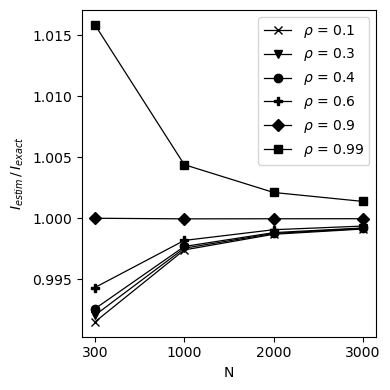

In [210]:


fig = plt.figure(figsize=(4,4))

for idx_rho in range(temp.shape[1]):
    plt.plot(temp[:,idx_rho], marker = marker_list[idx_rho], label=r"$\rho$" + f" = {rho_list[idx_rho]}", color="black", linewidth = 0.9)

plt.gca().set_xticks(range(n_mesh_list.__len__()))
plt.gca().set_xticklabels(n_mesh_list)

plt.xlabel("N")
plt.ylabel(r"$I_{estim}\, /\, I_{exact}$")
plt.legend();
plt.tight_layout()


# gaussian example zoom
# gaussian example all
# plt.savefig(graphics_path + "/gaussian example zoom.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example zoom", bbox_inches='tight')

# Using original paper simple histogram

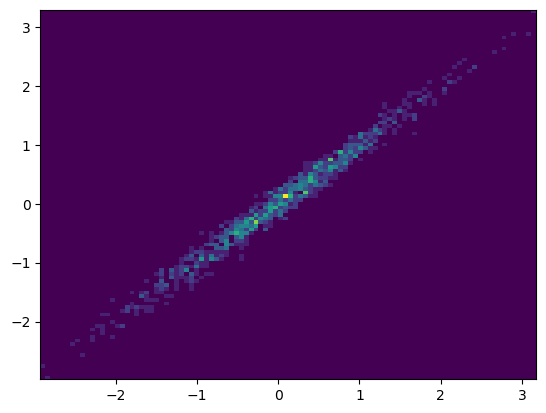

In [159]:

plt.hist2d(sim[:,0], sim[:,1], bins = (100,100));

In [163]:
-0.5*np.log(1-rho**2)

1.9585177736258443

10it [00:00, 1666.32it/s]
10it [00:00, 1666.66it/s]
10it [00:00, 1999.48it/s]
10it [00:00, 1428.24it/s]
10it [00:00, 1666.26it/s]
10it [00:00, 1666.13it/s]
6it [00:00, 83.32it/s]


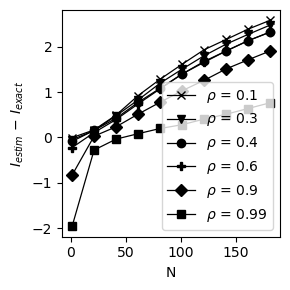

In [33]:
fig = plt.figure(figsize=(3,3))



# n_mesh_list = range(1,40,4)
n_mesh_list = range(1,200,20)

rho_list = [0.1, 0.3, 0.4, 0.6, 0.9, 0.99]

for idx_rho, rho in tqdm(enumerate(rho_list)):
    # if idx_rho < 2:
    #     continue

    I_true = -0.5*np.log(1-rho**2)

    R = np.array([[1,rho],[rho,1]])
    sim = scipy.stats.multivariate_normal.rvs(mean = np.zeros(2), cov = R, size = 1_000)

    res_list = np.full(n_mesh_list.__len__(), np.nan)

    for idx, n_mesh in tqdm(enumerate(n_mesh_list)):
        hist = np.histogram2d(sim[:,0], sim[:,1], bins = (n_mesh,n_mesh), density=False)

        densities = hist[0] / sim.shape[0] + 1e-100
        Deltas = np.diff(hist[1]) * np.diff(hist[2])[:,None]
        f0 = densities.sum(axis = 0)
        f1 = densities.sum(axis = 1)
        d0 = np.diff(hist[1])
        d1 = np.diff(hist[2])

        # Using entropy to calculate MI
        res = (densities * np.nan_to_num(np.log(densities / Deltas))).sum() - (f0*np.log(f0 / d0)).sum() - (f1*np.log(f1/d1) ).sum()
        res_list[idx] = res


    plt.plot(n_mesh_list,res_list - I_true, label=r"$\rho$" + f" = {rho}", marker = marker_list[idx_rho], color="black", linewidth = 0.9)
    # plt.axhline(y = -0.5*np.log(1-rho**2), color = "r")

plt.xlabel("N")
# plt.ylabel(r"$I_{estim}\, /\, I_{exact}$")
plt.ylabel(r"$I_{estim}\, -\, I_{exact}$")
plt.legend();
plt.tight_layout()



# gaussian example original all
# gaussian example original zoom
# gaussian example original high corr
# plt.savefig(graphics_path + "/gaussian example original high corr.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original high corr", bbox_inches='tight')

# plt.savefig(graphics_path + "/gaussian example original all - error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original all - error", bbox_inches='tight')

# plt.savefig(graphics_path + "/gaussian example original all extended - error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original all extended - error", bbox_inches='tight')


# plt.savefig(graphics_path + "/gaussian example original zoom.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original zoom", bbox_inches='tight')

# Using B-splines

In [15]:
def z_from_x(x, M, k):
    x_min = x.min()
    x_max = x.max()
    z = (x - x_min) * (M - k + 1)/(x_max - x_min)
    return lambda l : (l - x_min) * (M - k)/(x_max - x_min)

def knots(k,M):
    t = [ (i<k) * 0 + (i-k+1)*(i >= k)*(i<=M-1) + (M-1-k+2)*(i>M-1) for i in range(M+1+k)]
    return np.array(t)

def Bx(x,k,i,t):
    if k == 0:
        if i >= M-1:
            return t[i] <= x
        else:
            return (t[i] <= x) & ( x < t[i+1])
    
    if t[i+k] == t[i]:
        c1 = 0
    else:
        c1 = Bx(x,k-1,i,t) * (x-t[i])/(t[i+k] - t[i]) 

    if t[i+k+1] == t[i+1]:
        c2 = 0
    else:
        c2 = Bx(x,k-1,i+1,t) * (t[i+k+1] - x)/(t[i+k+1] - t[i+1])

    return c1 + c2

10it [00:01,  6.15it/s]
10it [00:01,  5.96it/s]
10it [00:01,  5.92it/s]
10it [00:01,  5.97it/s]
10it [00:01,  5.80it/s]
10it [00:01,  5.62it/s]
6it [00:10,  1.70s/it]


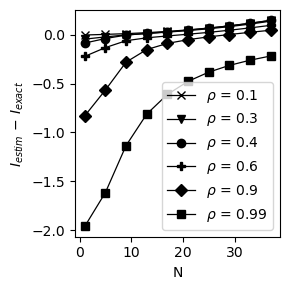

In [85]:

# n_bins = 100
# M = n_bins - 1
p = 3


fig = plt.figure(figsize=(3,3))



n_mesh_list = range(1,40,4)
# n_mesh_list = range(1,200,20)

rho_list = [0.1, 0.3, 0.4, 0.6, 0.9, 0.99]

for idx_rho, rho in tqdm(enumerate(rho_list)):
    # if idx_rho < 4:
    #     continue

    I_true = -0.5*np.log(1-rho**2)

    R = np.array([[1,rho],[rho,1]])
    sim = scipy.stats.multivariate_normal.rvs(mean = np.zeros(2), cov = R, size = 1_000)

    res_list = np.full(n_mesh_list.__len__(), np.nan)

    for idx, n_mesh in tqdm(enumerate(n_mesh_list)):

        x, y = sim[:,0], sim[:,1]

        M = n_mesh - 1
        t = knots(p,M)

        # px
        z_transformer_x = z_from_x(x,M,p)
        px_kernel = np.vstack([Bx(z_transformer_x(x),p,i,t) for i in range(-1,M)])
        px = px_kernel.mean(axis = 1)
        px_nonnull = px[px > 0]

        # Py
        z_transformer_y = z_from_x(y,M,p)
        py_kernel = np.vstack([Bx(z_transformer_y(y),p,i,t) for i in range(-1,M)])
        py = py_kernel.mean(axis = 1)
        py_nonnull = py[py > 0]


        # Pxy
        # pxy_kernel = py_kernel[:,None,:] * px_kernel[None,:,:]
        # pxy = (pxy_kernel).mean(axis = 2)
        pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]
        pxy_nonnull = pxy[pxy > 0]

        
        # print(f"xy: {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")
        # print( (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum() )

        res_list[idx] = (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum()

        # hist = np.histogram2d(sim[:,0], sim[:,1], bins = (n_mesh,n_mesh), density=False)

        # densities = hist[0] / sim.shape[0] + 1e-100
        # Deltas = np.diff(hist[1]) * np.diff(hist[2])[:,None]
        # f0 = densities.sum(axis = 0)
        # f1 = densities.sum(axis = 1)
        # d0 = np.diff(hist[1])
        # d1 = np.diff(hist[2])

        # # Using entropy to calculate MI
        # res = (densities * np.nan_to_num(np.log(densities / Deltas))).sum() - (f0*np.log(f0 / d0)).sum() - (f1*np.log(f1/d1) ).sum()
        # res_list[idx] = res


    plt.plot(n_mesh_list,res_list - I_true, label=r"$\rho$" + f" = {rho}", marker = marker_list[idx_rho], color="black", linewidth = 0.9)
    # plt.axhline(y = -0.5*np.log(1-rho**2), color = "r")

plt.xlabel("N")
# plt.ylabel(r"$I_{estim}\, /\, I_{exact}$")
plt.ylabel(r"$I_{estim}\, -\, I_{exact}$")
plt.legend();
plt.tight_layout()



# gaussian example original all
# gaussian example original zoom
# gaussian example original high corr
# plt.savefig(graphics_path + "/gaussian example original high corr - B-spline - error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original high corr - B-spline - error", bbox_inches='tight')

# plt.savefig(graphics_path + "/gaussian example original all - B-spline.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original all - B-spline", bbox_inches='tight')


# plt.savefig(graphics_path + "/gaussian example original zoom - B-spline - error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original zoom - B-spline - error", bbox_inches='tight')

# Using M-splines

In [41]:
def z_from_x(x, M, k):
    x_min = x.min()
    x_max = x.max()
    # z = (x - x_min) * (M - k + 1)/(x_max - x_min)
    return lambda l : (l - x_min)/(x_max - x_min)

def knots(k,M):
    t = [ (i<k) * 0 + (i-k+1)*(i >= k)*(i<=M-1) + (M-1-k+2)*(i>M-1) for i in range(M+1+k)]
    return np.array(t) / (M - k + 1)

def Mx(x,k,i,t):
    if k == 0:
        if i >= M-1:
            if (t[i+1] - t[i]) > 0:
                return (1/ (t[i+1] - t[i])) * ((t[i] <= x) & ( x <= t[i+1]))
            else:
                return 0 * x
        else:
            if (t[i+1] - t[i]) > 0:
                return (1/ (t[i+1] - t[i])) * ((t[i] <= x) & ( x < t[i+1]))
            else:
                return 0 * x
    
    if t[i+k+1] == t[i]:
        return 0 * x
    else:
        return (k+1) /(k) / (t[i+k+1] - t[i]) * ( Mx(x,k-1,i,t) * (x-t[i]) + Mx(x,k-1,i+1,t) * (t[i+k+1] - x) )




10it [00:00, 37.03it/s]
10it [00:00, 36.76it/s]
6it [00:00, 10.76it/s]


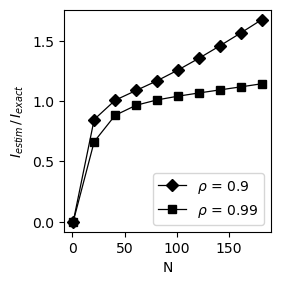

In [80]:

# n_bins = 100
# M = n_bins - 1
p = 3


fig = plt.figure(figsize=(3,3))



# n_mesh_list = range(1,40,4)
n_mesh_list = range(1,200,20)

rho_list = [0.1, 0.3, 0.4, 0.6, 0.9, 0.99]

for idx_rho, rho in tqdm(enumerate(rho_list)):
    if idx_rho < 4:
        continue

    I_true = -0.5*np.log(1-rho**2)

    R = np.array([[1,rho],[rho,1]])
    sim = scipy.stats.multivariate_normal.rvs(mean = np.zeros(2), cov = R, size = 1_000)

    res_list = np.full(n_mesh_list.__len__(), np.nan)

    for idx, n_mesh in tqdm(enumerate(n_mesh_list)):

        x, y = sim[:,0], sim[:,1]

        M = n_mesh
        t = knots(p,M)

        # px
        z_transformer_x = z_from_x(x,M,p)
        px_kernel = np.vstack([Mx(z_transformer_x(x),p,i,t) for i in range(-1,M)])
        # px = px_kernel.mean(axis = 1)
        px_nonnull = px[px > 0]

        # Py
        z_transformer_y = z_from_x(y,M,p)
        py_kernel = np.vstack([Mx(z_transformer_y(y),p,i,t) for i in range(-1,M)])
        # py = py_kernel.mean(axis = 1)
        py_nonnull = py[py > 0]


        # Pxy
        # pxy_kernel = py_kernel[:,None,:] * px_kernel[None,:,:]
        # pxy = (pxy_kernel).mean(axis = 2)
        pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]
        # pxy_nonnull = pxy[pxy > 0]

        pxy[pxy < 0] = 0

        # normalize
        pxy_sum = pxy.sum()
        # px_nonnull = px_nonnull / pxy_sum
        # py_nonnull = py_nonnull / pxy_sum
        pxy = pxy / pxy_sum
        pxy_nonnull = pxy[pxy > 0]

        py = pxy.sum(axis = 0)
        py_nonnull = py[py > 0]

        px = pxy.sum(axis = 1)
        px_nonnull = px[px > 0]

        
        # print(f"xy: {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")
        # print( (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum() )

        res_list[idx] = (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum()

        # hist = np.histogram2d(sim[:,0], sim[:,1], bins = (n_mesh,n_mesh), density=False)

        # densities = hist[0] / sim.shape[0] + 1e-100
        # Deltas = np.diff(hist[1]) * np.diff(hist[2])[:,None]
        # f0 = densities.sum(axis = 0)
        # f1 = densities.sum(axis = 1)
        # d0 = np.diff(hist[1])
        # d1 = np.diff(hist[2])

        # # Using entropy to calculate MI
        # res = (densities * np.nan_to_num(np.log(densities / Deltas))).sum() - (f0*np.log(f0 / d0)).sum() - (f1*np.log(f1/d1) ).sum()
        # res_list[idx] = res


    plt.plot(n_mesh_list,res_list / I_true, label=r"$\rho$" + f" = {rho}", marker = marker_list[idx_rho], color="black", linewidth = 0.9)
    # plt.axhline(y = -0.5*np.log(1-rho**2), color = "r")

plt.xlabel("N")
plt.ylabel(r"$I_{estim}\, /\, I_{exact}$")
# plt.ylabel(r"$I_{estim}\, -\, I_{exact}$")
plt.legend();
plt.tight_layout()



# gaussian example original all
# gaussian example original zoom
# gaussian example original high corr
# plt.savefig(graphics_path + "/gaussian example original high corr - M-spline - relative error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original high corr - M-spline - relative error", bbox_inches='tight')

# plt.savefig(graphics_path + "/gaussian example original all - M-spline - relative error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original all - M-spline - relative error", bbox_inches='tight')


# plt.savefig(graphics_path + "/gaussian example original zoom - M-spline - relative error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original zoom - M-spline - relative error", bbox_inches='tight')




# plt.savefig(graphics_path + "/gaussian example original high corr - M-spline - relative error.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/gaussian example original high corr - M-spline - relative error", bbox_inches='tight')

In [71]:
px

array([-1.59470746e-04,  1.05537125e-03,  1.43215196e-04,  1.06813655e-03,
        4.11358239e-03,  4.06604366e-03,  5.24763477e-03,  1.00102463e-02,
        1.65684471e-02,  2.32476325e-02,  2.67255882e-02,  3.27024436e-02,
        4.68989860e-02,  5.56253803e-02,  5.68548294e-02,  7.30726160e-02,
        6.96775427e-02,  7.07665299e-02,  7.87257413e-02,  7.50813074e-02,
        6.70059226e-02,  5.86323712e-02,  4.93935693e-02,  4.47129471e-02,
        3.44276897e-02,  2.99023894e-02,  1.98893669e-02,  1.62488970e-02,
        9.74858308e-03,  5.47758929e-03,  3.78320324e-03,  2.09119768e-03,
        1.15573254e-03,  8.90630973e-04,  7.89584055e-04,  3.78672347e-04,
        4.34100380e-06,  3.97550852e-03])

In [191]:
-0.5 * np.log(1 - 0.0**2)

-0.0

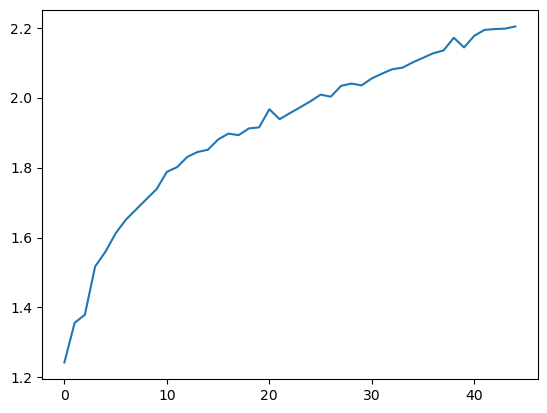

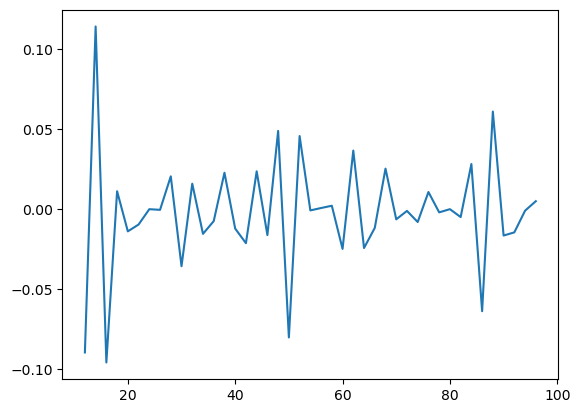

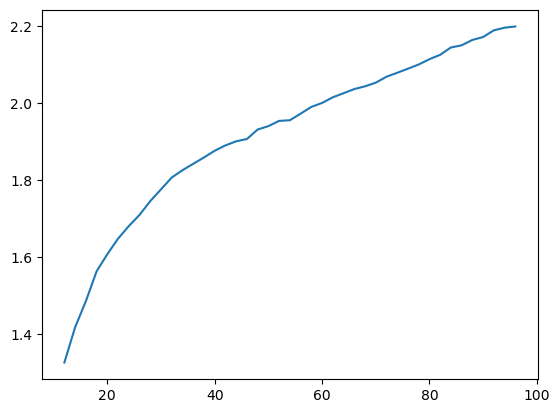

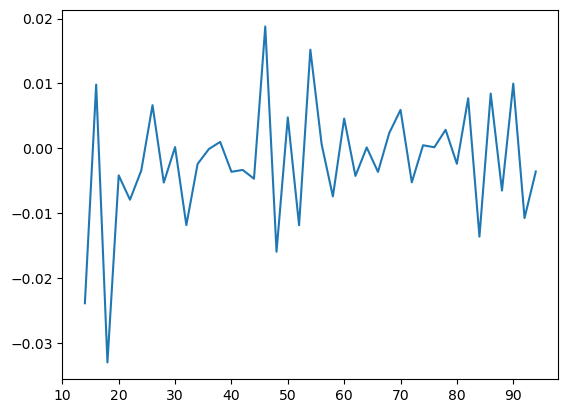

In [175]:
temp = np.array(res_list)
plt.plot(temp)
plt.show()
plt.plot(n_mesh_list[1:-1], - 2 * temp[1:-1] + temp[2:] + temp[:-2])
plt.show()

temp = (temp[2:] + temp[1:-1] + temp[:-2])/3
plt.plot(n_mesh_list[1:-1],temp)
plt.show()

plt.plot(n_mesh_list[2:-2], - 2 * temp[1:-1] + temp[2:] + temp[:-2])

19it [00:00, 35.33it/s]


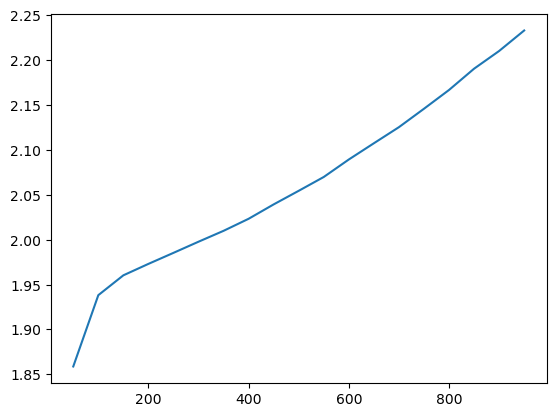

In [149]:
# n_mesh = 11

# n_mesh_list = range(10,30,1)
# n_mesh_list = range(1,600,10)
n_mesh_list = range(50,1000,50)

res_list = np.full(n_mesh_list.__len__(), np.nan)

for idx, n_mesh in tqdm(enumerate(n_mesh_list)):
    hist = np.histogram2d(sim[:,0], sim[:,1], bins = (n_mesh,n_mesh), density=False)

    densities = hist[0] / sim.shape[0] + 1e-100
    Deltas = np.diff(hist[1]) * np.diff(hist[2])[:,None]
    f0 = densities.sum(axis = 0)
    f1 = densities.sum(axis = 1)
    d0 = np.diff(hist[1])
    d1 = np.diff(hist[2])


    # Using entropy
    res = (densities * np.nan_to_num(np.log(densities))).sum() - (f0*np.log(f0)).sum() - (f1*np.log(f1) ).sum()
    res_list[idx] = res
    # print(res)

    # using formula directly (no smart tricks)
    # f0 = densities.sum(axis = 0,keepdims=True)
    # f1 = densities.sum(axis = 1,keepdims=True)
    # res = (densities * np.nan_to_num(np.log(densities / (f0 * f1)))).sum()
    # print(res)

plt.plot(n_mesh_list,res_list)

# Convert simulated normal to uniforms and redo with emperical copula